### intensity transformation on image "Emma"

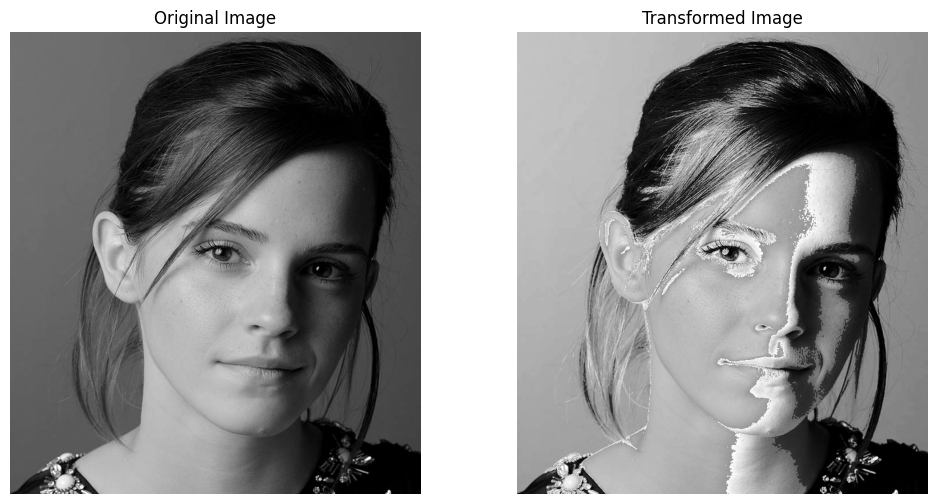

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the intensity transformation
def transform_intensity(input_intensity):
    if 50 < input_intensity < 150:
        return input_intensity * 1.55 + 22.5 # Second segment slope
    else:
        return input_intensity * 1.0  # First and Third segment slope

# Load the image in grayscale
image_path = r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\emma.jpg" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is loaded
if image is None:
    print("Error: Image did not load.")
    exit()

# Apply the transformation
lut = np.array([transform_intensity(i) for i in range(256)], dtype=np.uint8)
output_image = cv2.LUT(image, lut)

# Display the original and transformed images using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(output_image, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()


### white matter & gray matter transformations in a brain proton density image

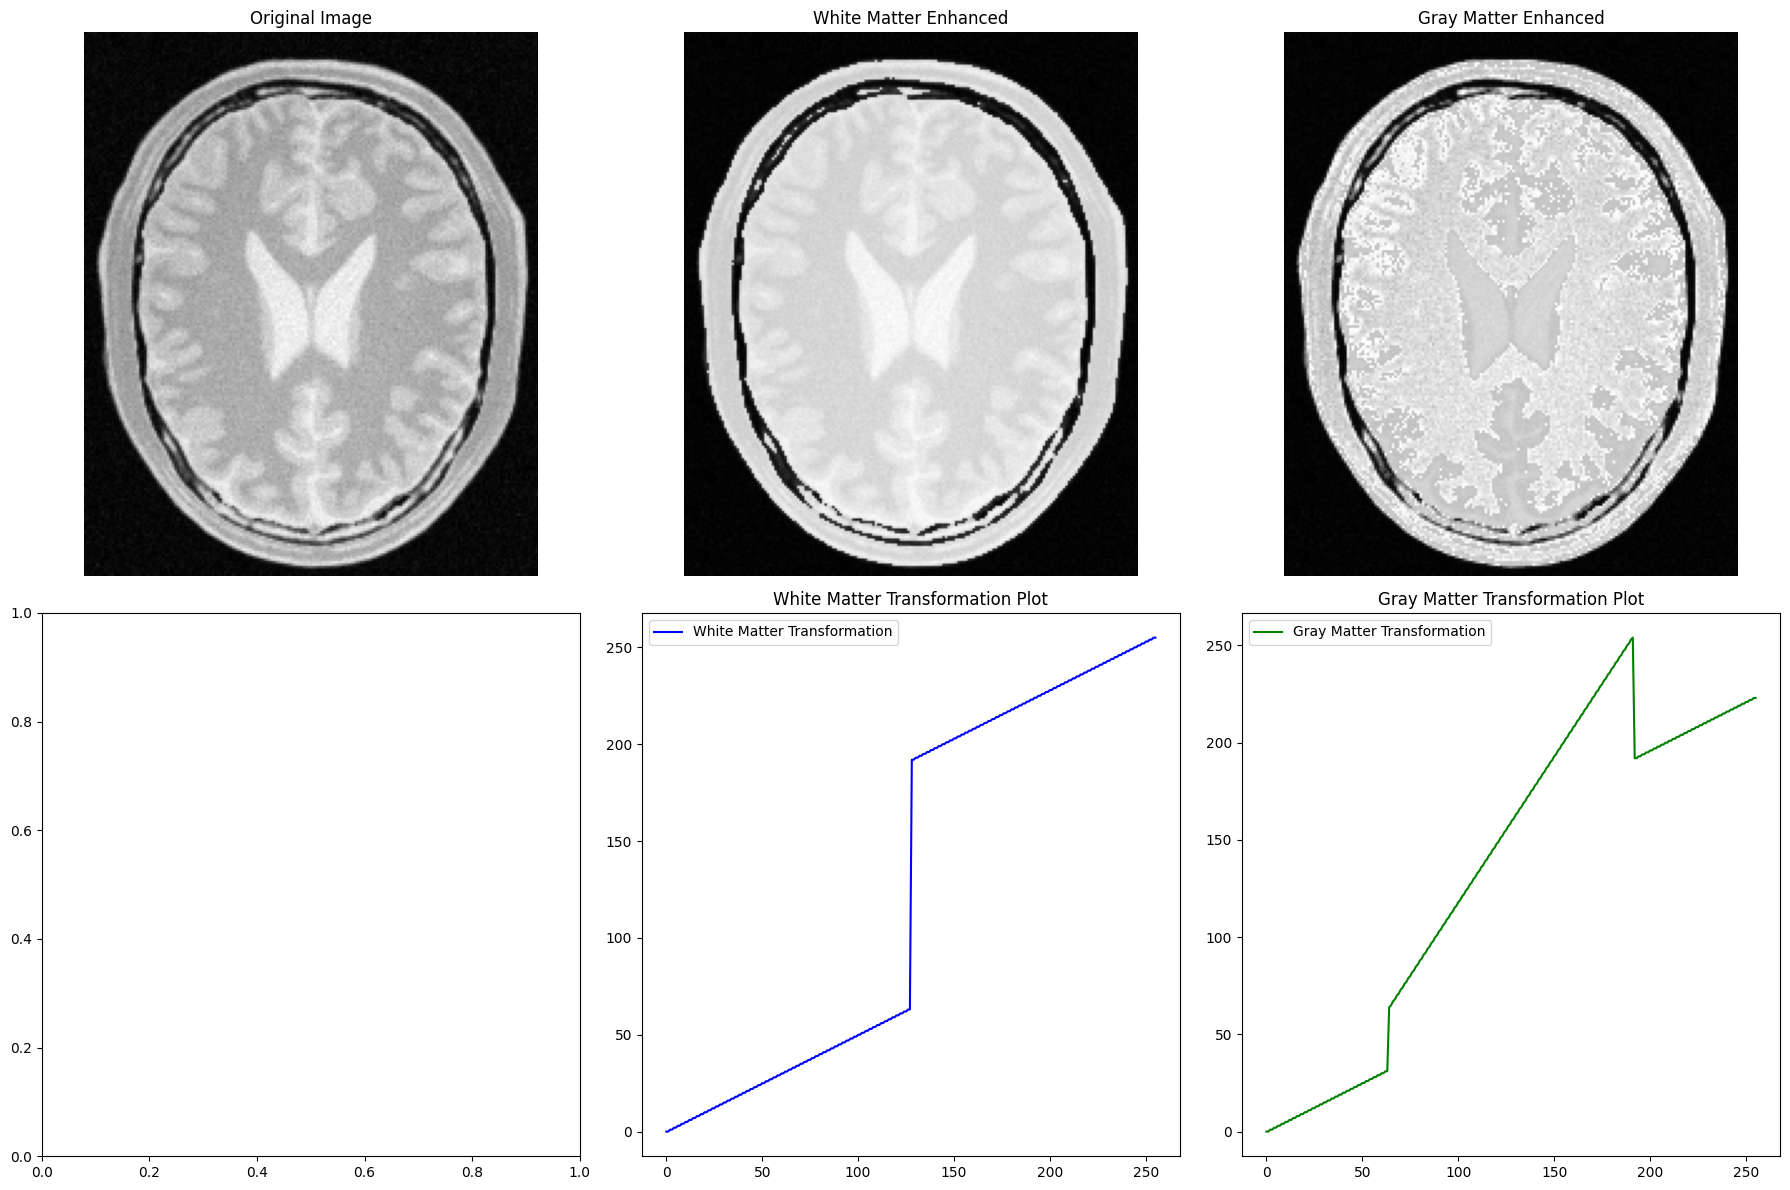

In [15]:
# Function to transform intensities for white matter accentuation
def transform_white_matter(input_intensity):
    if input_intensity < 128:
        return input_intensity * 0.5   # Reduce intensities below 128
    else:
        return 192 + (input_intensity - 128) * 0.5 # Amplify intensities above 128

# Function to transform intensities for gray matter accentuation
def transform_gray_matter(input_intensity):
    if input_intensity < 64:
        return input_intensity * 0.5   # Reduce intensities below 64
    elif input_intensity < 192:
        return 64 + (input_intensity - 64) * 1.5   # Amplify intensities between 64 and 192
    else:
        return 192 + (input_intensity - 192) * 0.5    # Reduce intensities above 192


# Load the MRI image in grayscale
image_path = r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\brain_proton_density_slice.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if image is None:
    print("Error: Image not found.")
    exit()

# Generate LUTs for both transformations
lut_white = np.array([transform_white_matter(i) for i in range(256)], dtype=np.uint8)
lut_gray = np.array([transform_gray_matter(i) for i in range(256)], dtype=np.uint8)

# Apply transformations using LUT
white_matter_image = cv2.LUT(image, lut_white)
gray_matter_image = cv2.LUT(image, lut_gray)

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# White matter enhanced image
axs[0, 1].imshow(white_matter_image, cmap='gray')
axs[0, 1].set_title('White Matter Enhanced')
axs[0, 1].axis('off')

# Gray matter enhanced image
axs[0, 2].imshow(gray_matter_image, cmap='gray')
axs[0, 2].set_title('Gray Matter Enhanced')
axs[0, 2].axis('off')

# Plot transformation curves
x = np.arange(256)
axs[1, 1].plot(x, lut_white, label='White Matter Transformation', color='blue')
axs[1, 1].set_title('White Matter Transformation Plot')
axs[1, 1].legend()

axs[1, 2].plot(x, lut_gray, label='Gray Matter Transformation', color='green')
axs[1, 2].set_title('Gray Matter Transformation Plot')
axs[1, 2].legend()

plt.tight_layout()
plt.show()
